In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

<class 'numpy.ndarray'> 100


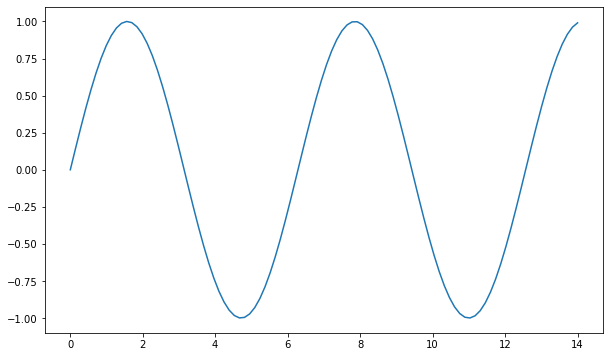

In [3]:
x = np.linspace(0,14,100)
print( type(x), len(x) )

y1 = np.sin(x)
y2 = 2*np.sin(x+0.5)
y3 = 4*np.sin(x+1.0)

plt.figure(figsize=(10,6))   # 그림의 크기
plt.plot(x, y1)

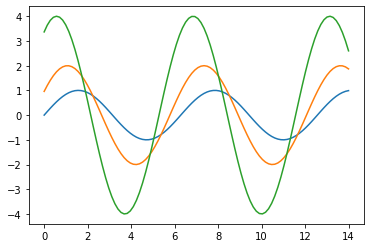

In [4]:
plt.plot(x, y1, x,y2, x, y3)   # 3개의 sin 그래프

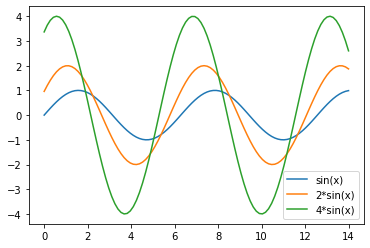

In [5]:
plt.plot(x, y1, label='sin(x)')
plt.plot(x, y2, label='2*sin(x)')
plt.plot(x, y3, label='4*sin(x)')   # 3개의 sin 그래프

plt.legend()

### tip 데이터 살펴보고 인사이트 얻기

In [6]:
sns.set_style("whitegrid")

In [7]:
tips = sns.load_dataset("tips")  # 인터넷이 켜져 있어야 함
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


#### (실습) 2-3 그래프 그려보기(1~2개)
* 각각의 그래프가 언제 사용되는지 (1-2줄)
* 그래프를 보고 확인한 점.

In [8]:
tips.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

<function matplotlib.pyplot.show(close=None, block=None)>

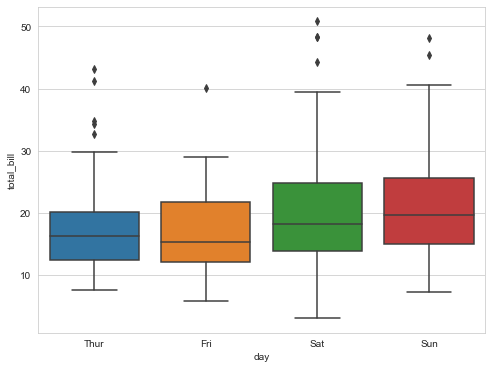

In [9]:
plt.figure(figsize=(8,6))
sns.boxplot(x="day", y="total_bill", data=tips)
plt.show

<AxesSubplot:xlabel='day', ylabel='total_bill'>

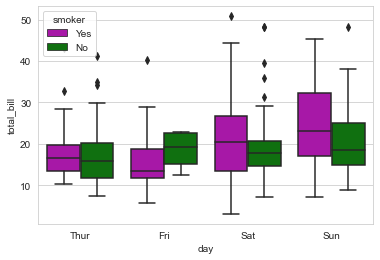

In [10]:
sns.boxplot(x="day", y="total_bill",
            hue="smoker", palette=["m", "g"],
            data=tips)

<AxesSubplot:xlabel='sex', ylabel='Count'>

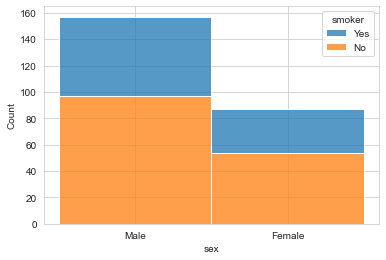

In [11]:
sns.histplot(tips, x="sex", hue="smoker", multiple="stack")
# hue : 색 구분을 통해 추가적인 정보 구별

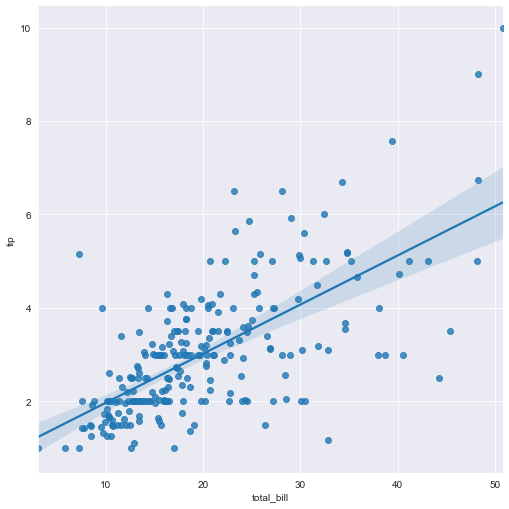

In [15]:
sns.set_style("darkgrid")
sns.lmplot(x='total_bill', y='tip', data=tips, height=7)
plt.show()

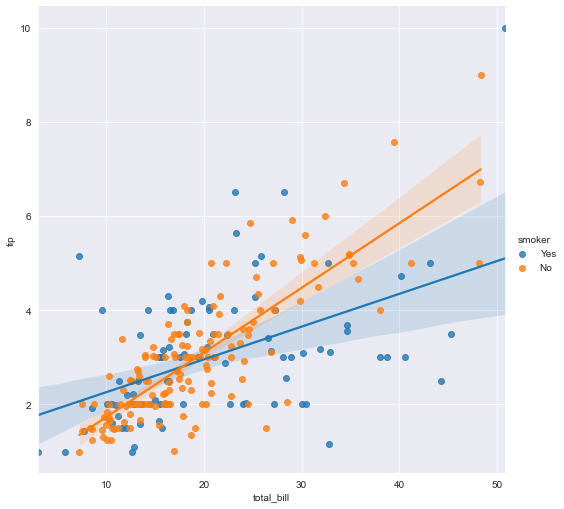

In [18]:
sns.lmplot(x="total_bill", y="tip", hue='smoker', data=tips, height=7)

In [16]:
tips.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [19]:
tips.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


### 항공데이터

#### 01. 데이터 행과 열
#### 02. 데이터 컬럼 확인(컬럼이름, 컬럼 자료형)
#### 03. 데이터 요약 값
#### 04. 데이터 실제 확인

In [20]:
fg = sns.load_dataset('flights')

print( fg.shape   ) # 행과 열
print()
print( fg.columns ) # 컬럼명 확인
print()
print( fg.info()  ) # 행과열, 컬럼명, 자료형
print()
print( fg.dtypes  ) # 컬럼의 자료형
print( fg.dtypes[0]  ) # 컬럼의 자료형
print()
print( fg.describe() )  #수치형의 요약값
print( fg.head(5) )
print( fg.tail(5) )

(144, 3)

Index(['year', 'month', 'passengers'], dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year        144 non-null    int64   
 1   month       144 non-null    category
 2   passengers  144 non-null    int64   
dtypes: category(1), int64(2)
memory usage: 2.9 KB
None

year             int64
month         category
passengers       int64
dtype: object
int64

              year  passengers
count   144.000000  144.000000
mean   1954.500000  280.298611
std       3.464102  119.966317
min    1949.000000  104.000000
25%    1951.750000  180.000000
50%    1954.500000  265.500000
75%    1957.250000  360.500000
max    1960.000000  622.000000
   year month  passengers
0  1949   Jan         112
1  1949   Feb         118
2  1949   Mar         132
3  1949   Apr         129
4  1949   May         121
     year month  passengers
139  1960 

In [24]:
fg = sns.load_dataset('flights')
type(fg)

pandas.core.frame.DataFrame

In [21]:
fgp = fg.pivot("month", "year", "passengers")
fgp

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


In [22]:
fgp = fg.pivot("month", "year", "passengers")
fgp

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


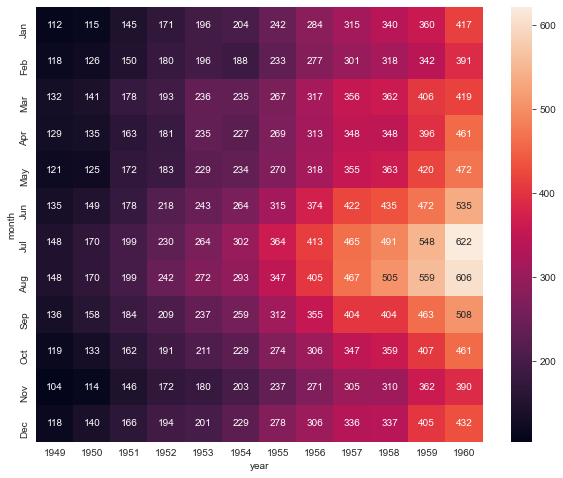

In [23]:
plt.figure(figsize=(10,8))
sns.heatmap(fgp, annot=True, fmt="d")
plt.show()

### iris 데이터 시각화

In [26]:
iris = sns.load_dataset("iris")
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [27]:
## csv 데이터 셋 만들기
iris.to_csv("iris.csv", index=False)
## xlsx 파일 만들기
iris.to_excel("iris.xlsx", index=False)

In [28]:
import pandas as pd

In [29]:
iris_csv = pd.read_csv("iris.csv")
iris_csv.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [30]:
iris_excel = pd.read_excel("iris.xlsx")
iris_excel.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


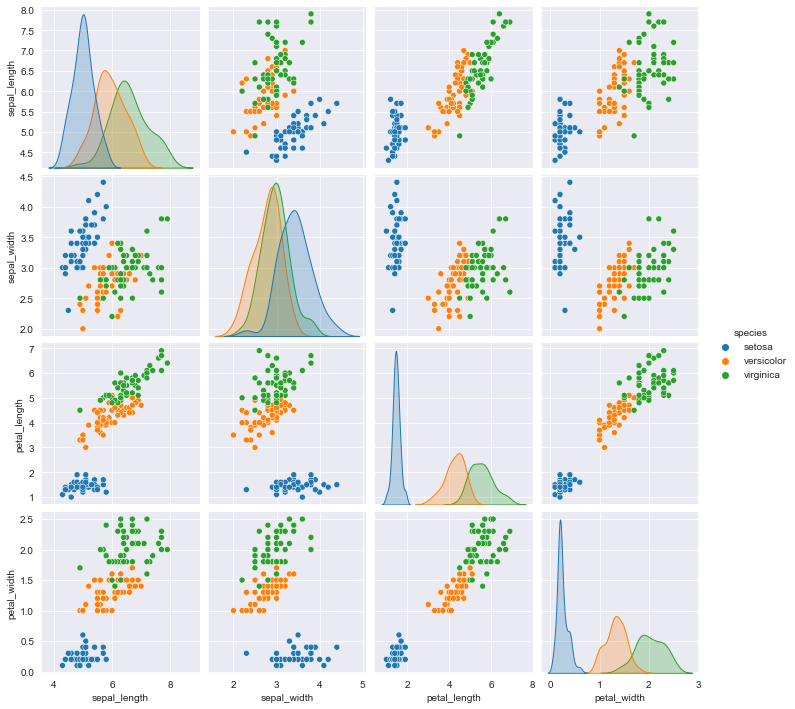

In [31]:
sns.pairplot(iris_excel, hue="species")
plt.show()

<AxesSubplot:xlabel='species', ylabel='sepal_length'>

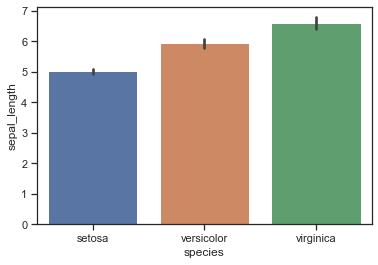

In [13]:
# 데이터 개수 확인
sns.barplot(x='species', y='sepal_length', data=iris)

### 4-2 실습) 네개의 feature(특징)에 대해서 barplot을 시각화 해보기

<AxesSubplot:>

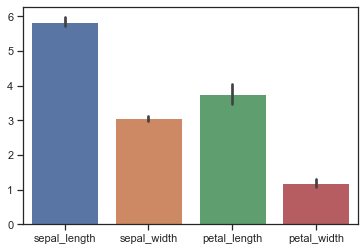

In [14]:
sns.barplot(data=iris)

[]

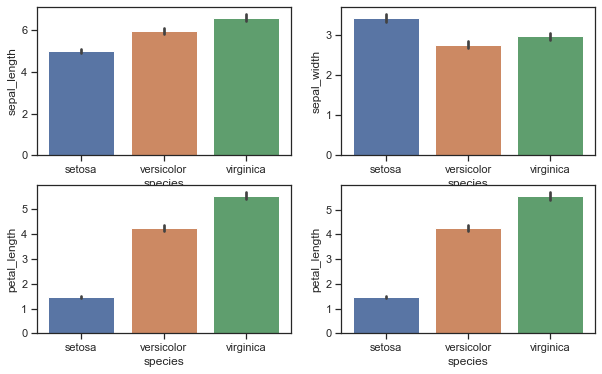

In [15]:
fig = plt.figure(figsize=(10,6))
fig.patch.set_facecolor('xkcd:white')

axis1 = fig.add_subplot(2, 2, 1)
axis1 = sns.barplot(x='species', y='sepal_length', data=iris)
axis1.plot()

axis2 = fig.add_subplot(2, 2, 2)
axis2 = sns.barplot(x='species', y='sepal_width', data=iris)
axis2.plot()

axis3 = fig.add_subplot(2, 2, 3)
axis3 = sns.barplot(x='species', y='petal_length', data=iris)
axis3.plot()

axis4 = fig.add_subplot(2, 2, 4)
axis4 = sns.barplot(x='species', y='petal_length', data=iris)
axis4.plot()

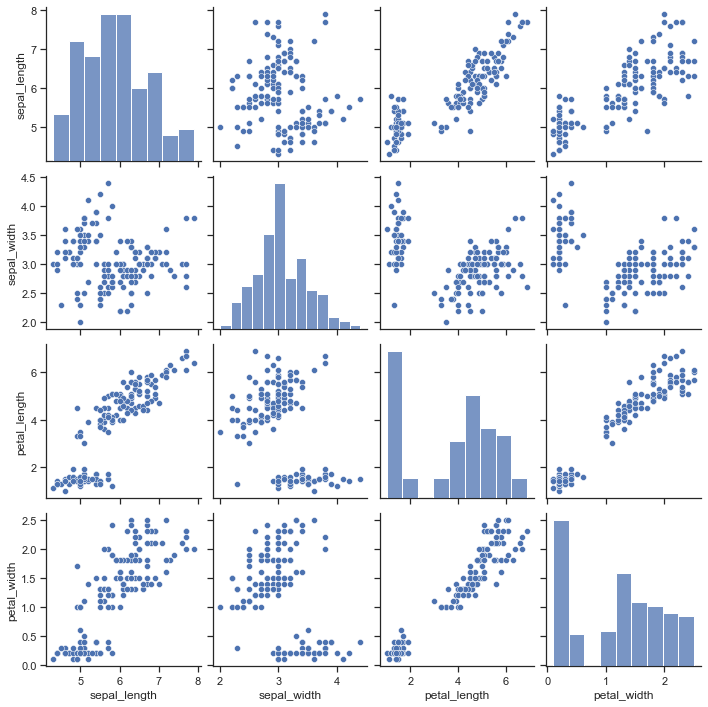

In [16]:
sns.pairplot(iris)

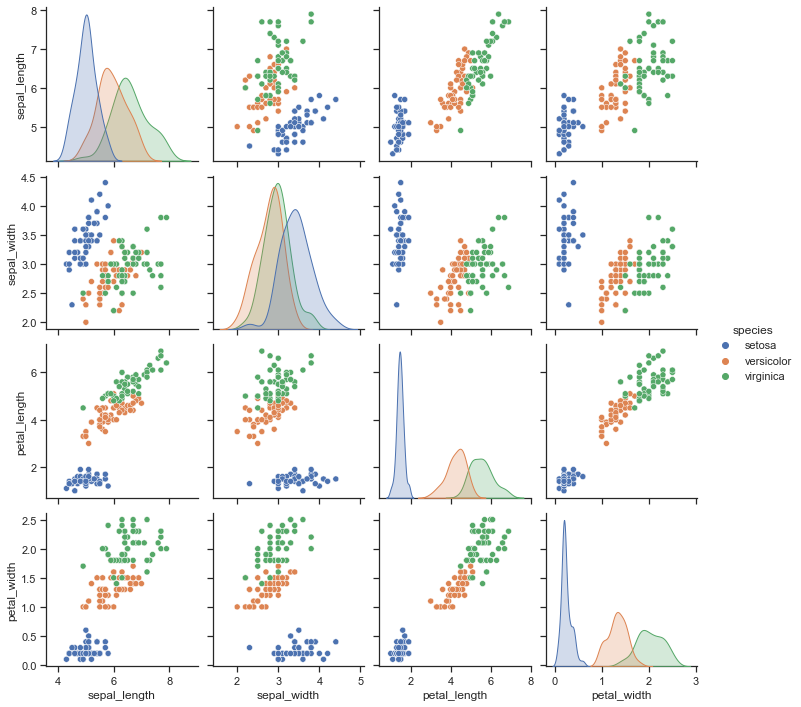

In [17]:
sns.pairplot(iris, hue='species')

In [18]:
iris.corr()  # 0.8 이상이면 상관관계가 높다고 판단

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000
